In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

In [405]:
wind2019test = pd.read_csv("Windenergie_Hochrechnung_2019.csv",sep = ";")


In [20]:
wind2019 = pd.read_csv("Windenergie_Hochrechnung_2019.csv",sep = ";")
wind2018 = pd.read_csv("Windenergie_Hochrechnung_2018.csv",sep =";")

###importing relevant datasets

In [22]:
wind2018 = wind2018.rename(columns={"Unnamed: 0": "Date"})
wind2018 = wind2018.drop(["Datum","Von","Offshore MW"],axis=1)
wind2018 = wind2018.drop([0,1,2],axis=0)
wind2018["Date"] = pd.to_datetime(wind2018["Date"],dayfirst=True)
#wind2018 = wind2018.rename(columns={"bis": "Total_MW"})
wind2018 = wind2018.rename(columns={"Datum": "From"})

### transformation of initial dataset to exclude non relevant columns

In [26]:
wind2018 = wind2018.rename(columns={"bis": "TotalMW"})

In [ ]:
wind2018 = wind2018.drop([0,1,2],axis=0)

In [27]:
wind2018 = wind2018.drop(["MW","Onshore MW","Offshore MW"],axis=1)


In [9]:
wind2019 = wind2019.set_index("Date")
wind2018 = wind2018.set_index("Date")


In [3]:
latest = pd.read_csv("partialnew.csv")

In [18]:
latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35038 entries, 0 to 35037
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35038 non-null  int64  
 1   X           35038 non-null  int64  
 2   From        35038 non-null  object 
 3   Date        35038 non-null  object 
 4   To          35038 non-null  object 
 5   TotalMW     35038 non-null  float64
 6   Hours       35038 non-null  int64  
 7   Minutes     35038 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.1+ MB


In [1]:
df_month.plot(figsize=(19,6))

NameError: name 'df_month' is not defined

In [65]:
df_month = df_month.set_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD24B49FC8>]],
      dtype=object)

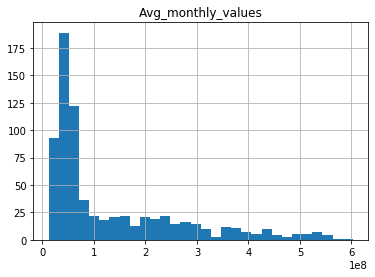

In [94]:
df_month.hist(bins=30)

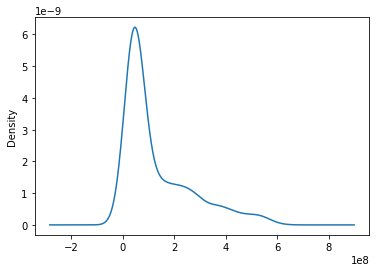

In [75]:
df_month["Avg_monthly_values"].plot.density() #data visualization

In [2]:
partial = pd.read_csv("partial5.csv") #brought back from R 

In [8]:
latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35038 entries, 0 to 35037
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     35038 non-null  object 
 1   X        35038 non-null  int64  
 2   From     35038 non-null  object 
 3   To       35038 non-null  object 
 4   TotalMW  35038 non-null  float64
 5   Hours    35038 non-null  int64  
 6   Minutes  35038 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.9+ MB


In [10]:
#partial = partial.drop(["Unnamed: 0"],axis=1)
#latest = latest.drop(["Unnamed: 0"],axis=1)
#latest = latest.reset_index()

#partial = partial.set_index("Date")
latest = latest.set_index("Date")

In [9]:
#partial["Date"] = pd.to_datetime(partial["Date"],dayfirst=True)
latest["Date"] = pd.to_datetime(latest["Date"],dayfirst=True)

In [11]:
#partial["Month"] = partial.index.month
#partial["Day"] = partial.index.day
latest["Month"] = latest.index.month


In [12]:
#monthly = partial.groupby('Date').mean()['TotalMW'] #daily averages of all 15 minute intra daily interval
#daily = partial.groupby('Day').mean()['Total_MW'] #averge of each day in the month over 6 months
hourly = latest.groupby(["Month","Hours"]).mean()["TotalMW"] #important groupby code


In [13]:
#arr_m = np.array(monthly)
#arr_d = np.array(daily)
arr_hourly = np.array(hourly)

In [26]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [12]:
df_month = pd.DataFrame(arr_m,index=monthly.index,columns=["Avg_monthly_values"]) #dataframe to be used in forecasting methods

In [14]:
df_daily = pd.DataFrame(arr_d,index=daily.index,columns=["Avg_daily_values"])

In [14]:
df_hourly = pd.DataFrame(arr_hourly,index=hourly.index,columns=["Avg hourly values "])

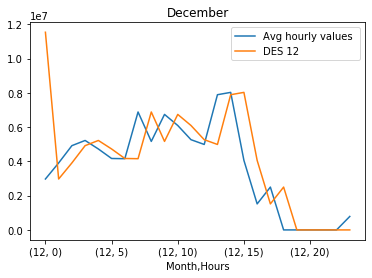

In [19]:
df_hourly.iloc[264:288].plot(title="December") #average hourly power supply for each month

In [4]:
df_hourly.head()

NameError: name 'df_hourly' is not defined

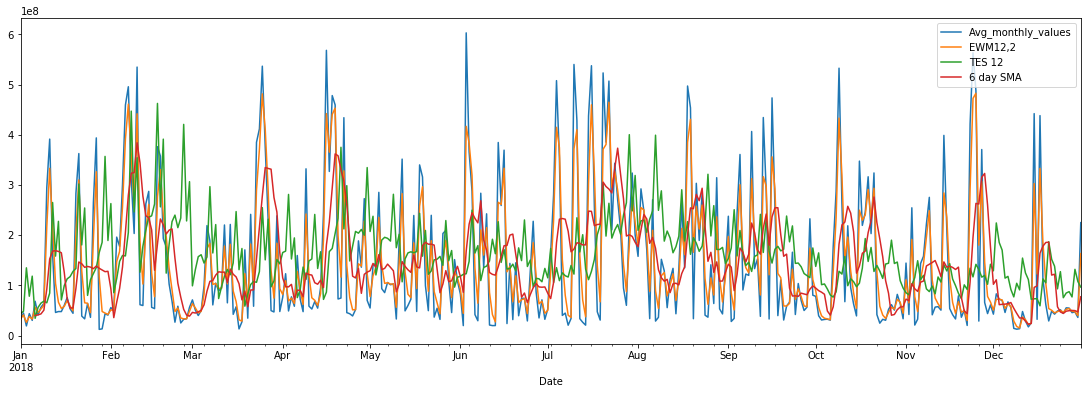

In [345]:
df_month[["Avg_monthly_values","EWM12,2","TES 12","6 day SMA"]].iloc[:365].plot(figsize=(19,6))

In [28]:
df_month["trend"] = power_trend

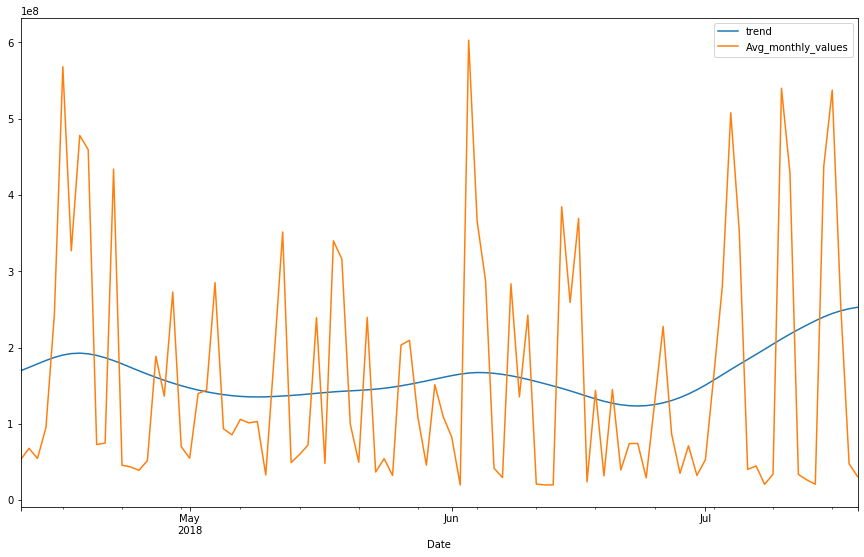

In [49]:
trend_fig = df_month[["trend","Avg_monthly_values"]].iloc[100:200].plot(figsize=(15,9)) #detailing trend component throughout the months



In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
result = seasonal_decompose(df_month["Avg_monthly_values"])

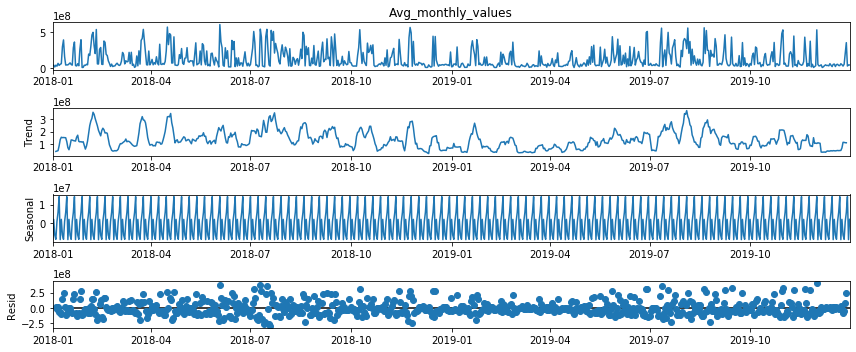

In [214]:
from pylab import rcParams

rcParams["figure.figsize"] =12,5

result.plot();

In [53]:
df_month.head()

,Avg_monthly_values,trend
Date,,
2018-01-01,3.354771e+07,4.575486e+07
2018-01-02,4.486788e+07,5.193128e+07
2018-01-03,1.922609e+07,5.810008e+07
2018-01-04,4.369631e+07,6.424921e+07
2018-01-05,3.031678e+07,7.034232e+07


In [34]:
df_month["12 day SMA"] = df_month["Avg_monthly_values"].rolling(window=12).mean() #12 day simple moving average

In [33]:
df_month["6 day SMA"] = df_month["Avg_monthly_values"].rolling(window=6).mean()  #6 day simple moving average

In [30]:
#holtwintersmethod

df_month.index.freq = "D"

In [330]:
df_month.head()

,Avg_monthly_values,"EWM12,2",TES 12,12 day SMA,6 day SMA,6 month SMA,12 month SMA
Date,,,,,,,
2018-01-01,3.354771e+07,3.354771e+07,4.400094e+07,NaN,NaN,NaN,NaN
2018-01-02,4.486788e+07,4.109449e+07,4.833369e+07,NaN,NaN,NaN,NaN
2018-01-03,1.922609e+07,2.651555e+07,1.349632e+08,NaN,NaN,NaN,NaN
2018-01-04,4.369631e+07,3.796939e+07,7.837725e+07,NaN,NaN,NaN,NaN
2018-01-05,3.031678e+07,3.286765e+07,1.183863e+08,NaN,NaN,NaN,NaN


In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing



In [45]:
span = 4
alpha = 2/(span+1)

In [46]:
model = SimpleExpSmoothing(df_month["Avg_monthly_values"])

C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [47]:
fitted = model.fit(smoothing_level=alpha,optimized=False)

In [48]:
fitted.fittedvalues

Date
2018-01-01         9.422943
2018-01-02         9.422943
2018-01-03         7.448481
2018-01-04         9.315932
2018-01-05         9.147637
                  ...      
2018-12-27    294462.633296
2018-12-28    176679.769639
2018-12-29    106009.689279
2018-12-30     63608.529652
2018-12-31     38169.307716
Length: 365, dtype: float64

In [56]:
df_month["SES12"] = fitted.fittedvalues

In [16]:
#double exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_hourly["DES 12"] = ExponentialSmoothing(df_hourly,trend="add").fit().fittedvalues

C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
#holtswinters method

In [17]:
df_hourly["TES 12"] = ExponentialSmoothing(df_hourly["Avg hourly values"],trend="add",seasonal="mul",seasonal_periods=24).fit().fittedvalues

KeyError: 'Avg hourly values'

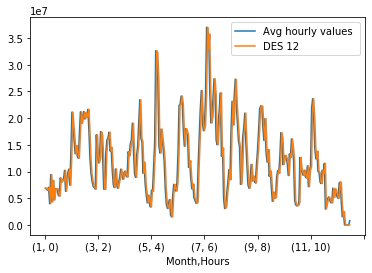

In [18]:
df_hourly.plot()

In [45]:
error = rmse(test["Avg_monthly_values"],test_predictions)

In [46]:
error

193274530.66836578

In [43]:
final_model = ExponentialSmoothing(train["Avg_monthly_values"],seasonal="add",seasonal_periods=365).fit()

C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [40]:
forecast_predictions = final_model.forecast(365)

In [126]:
df.to_csv("df.csv")

In [80]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults, ARIMAResults

In [81]:
from pmdarima import auto_arima

In [125]:
df_hourly.head()

Avg hourly values 
Month Hours                    
1     0            6.888735e+06
      1            6.682076e+06
      2            6.489519e+06
      3            7.047958e+06
      4            3.968078e+06

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

train = df_hourly["Avg hourly values"].iloc[:140]
test = df_hourly["Avg hourly values"].iloc[140:]

KeyError: 'Avg hourly values'

In [84]:
stepwise_fit = auto_arima(df_month["Avg_monthly_values"],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=True,trace=True,m=4)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,4) [intercept=True]; AIC=13140.022, BIC=13155.622, Time=0.295 seconds
Fit ARIMA(0,0,0)x(0,0,0,4) [intercept=True]; AIC=13136.451, BIC=13144.251, Time=0.025 seconds
Fit ARIMA(1,0,0)x(1,0,0,4) [intercept=True]; AIC=13088.832, BIC=13104.432, Time=0.147 seconds
Fit ARIMA(0,0,1)x(0,0,1,4) [intercept=True]; AIC=13094.569, BIC=13110.169, Time=0.150 seconds
Fit ARIMA(0,0,0)x(0,0,0,4) [intercept=False]; AIC=13301.413, BIC=13305.313, Time=0.015 seconds
Fit ARIMA(1,0,0)x(0,0,0,4) [intercept=True]; AIC=13087.027, BIC=13098.727, Time=0.053 seconds
Fit ARIMA(1,0,0)x(0,0,1,4) [intercept=True]; AIC=13088.718, BIC=13104.318, Time=0.178 seconds
Fit ARIMA(1,0,0)x(1,0,1,4) [intercept=True]; AIC=13090.675, BIC=13110.174, Time=0.321 seconds
Fit ARIMA(2,0,0)x(0,0,0,4) [intercept=True]; AIC=13088.849, BIC=13104.448, Time=0.149 seconds
Fit ARIMA(1,0,1)x(0,0,0,4) [intercept=True]; AIC=13088.884, BIC=13104.484, Time=0.159 seconds
Fit ARIMA(0,0,1)

In [85]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -6540.513
Date:                Sun, 08 Nov 2020   AIC                          13087.027
Time:                        13:29:44   BIC                          13098.727
Sample:                             0   HQIC                         13091.677
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.671e+06   9.55e-10   8.03e+15      0.000    7.67e+06    7.67e+06
ar.L1          0.3612      0.033     10.997      0.000       0.297       0.426
sigma2      2.149e+14   1.58e-17   1.36e+31      0.000    2.15e+14    2.15e+14
===================================================================================
Ljung-Box (Q):                       34.43   Jarque-Bera (JB):                78.52
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.08
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+45. Standard errors may be unstable.
"""

In [92]:
model = SARIMAX(train,order=(1,1,3),seasonal_order=(0,0,0,4))

C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [90]:
results = model.fit()

C:\Users\Narasyimmha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Avg_monthly_values   No. Observations:                  365
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -6527.517
Date:                Sun, 08 Nov 2020   AIC                          13065.035
Time:                        13:32:30   BIC                          13084.520
Sample:                    01-01-2018   HQIC                         13072.779
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9867      0.017    -56.997      0.000      -1.021      -0.953
ma.L1          0.3381      0.098      3.440      0.001       0.145       0.531
ma.L2         -0.9745      0.049    -20.074      0.000      -1.070      -0.879
ma.L3         -0.3132      0.060     -5.189      0.000      -0.431      -0.195
sigma2      2.375e+14   6.21e-16   3.82e+29      0.000    2.38e+14    2.38e+14
===================================================================================
Ljung-Box (Q):                       34.44   Jarque-Bera (JB):                82.63
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             1.11
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.6e+44. Standard errors may be unstable.
"""

In [88]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start,end,typ="levels").rename("SARIMAX")

In [31]:
df_month["SARIMAX"] = predictions

In [168]:
import pandas as pd
from fbprophet import Prophet

In [169]:
#df_month = df_month.reset_index()
df_month = df_month.rename(columns={"Avg_monthly_values": "y"})


NameError: name 'df_month' is not defined

In [157]:
df_month.head()

,ds,y
0,2018-01-01,3.354771e+07
1,2018-01-02,4.486788e+07
2,2018-01-03,1.922609e+07
3,2018-01-04,4.369631e+07
4,2018-01-05,3.031678e+07


In [172]:
m = Prophet(daily_seasonality=True)

m.fit(df_month)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [168]:
#placeholder dataframe

future = m.make_future_dataframe(periods=366)

In [169]:
future.tail()

,ds
1091,2020-12-27
1092,2020-12-28
1093,2020-12-29
1094,2020-12-30
1095,2020-12-31


In [173]:
forecast = m.predict(future)

In [156]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,1.528717e+08,-2.194062e+07,3.092791e+08,1.528717e+08,1.528717e+08,-9.436595e+06,-9.436595e+06,-9.436595e+06,-9.436595e+06,-9.436595e+06,-9.436595e+06,0.0,0.0,0.0,1.434351e+08
1,2018-01-02,1.528142e+08,-9.723340e+06,3.246529e+08,1.528142e+08,1.528142e+08,1.473576e+06,1.473576e+06,1.473576e+06,1.473576e+06,1.473576e+06,1.473576e+06,0.0,0.0,0.0,1.542878e+08
2,2018-01-03,1.527567e+08,-1.422747e+07,3.172901e+08,1.527567e+08,1.527567e+08,-5.907664e+06,-5.907664e+06,-5.907664e+06,-5.907664e+06,-5.907664e+06,-5.907664e+06,0.0,0.0,0.0,1.468490e+08
3,2018-01-04,1.526992e+08,-1.760867e+07,3.198936e+08,1.526992e+08,1.526992e+08,-7.987344e+06,-7.987344e+06,-7.987344e+06,-7.987344e+06,-7.987344e+06,-7.987344e+06,0.0,0.0,0.0,1.447119e+08
4,2018-01-05,1.526417e+08,-2.052540e+07,3.131570e+08,1.526417e+08,1.526417e+08,1.499704e+06,1.499704e+06,1.499704e+06,1.499704e+06,1.499704e+06,1.499704e+06,0.0,0.0,0.0,1.541414e+08


In [157]:
forecast[["ds","yhat_lower","yhat_upper","yhat"]].head()

,ds,yhat_lower,yhat_upper,yhat
0,2018-01-01,-2.194062e+07,3.092791e+08,1.434351e+08
1,2018-01-02,-9.723340e+06,3.246529e+08,1.542878e+08
2,2018-01-03,-1.422747e+07,3.172901e+08,1.468490e+08
3,2018-01-04,-1.760867e+07,3.198936e+08,1.447119e+08
4,2018-01-05,-2.052540e+07,3.131570e+08,1.541414e+08


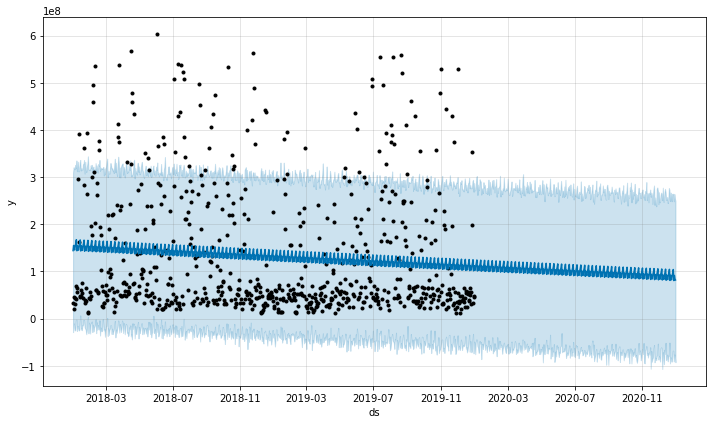

In [174]:
%matplotlib inline

m.plot(forecast);

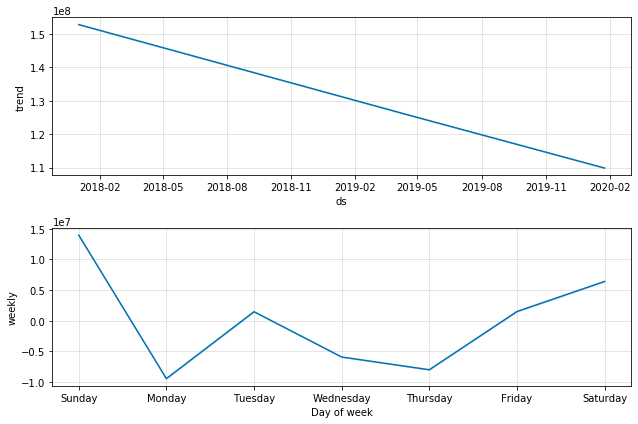

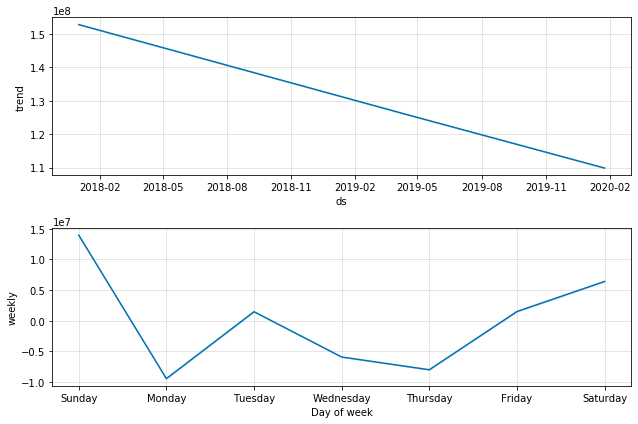

In [159]:
m.plot_components(forecast)

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
result = seasonal_decompose(df_month["Avg_monthly_values"].iloc[:365],model="additive")

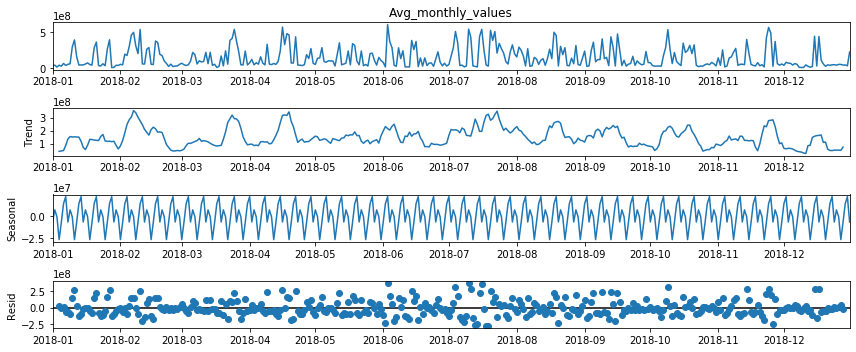

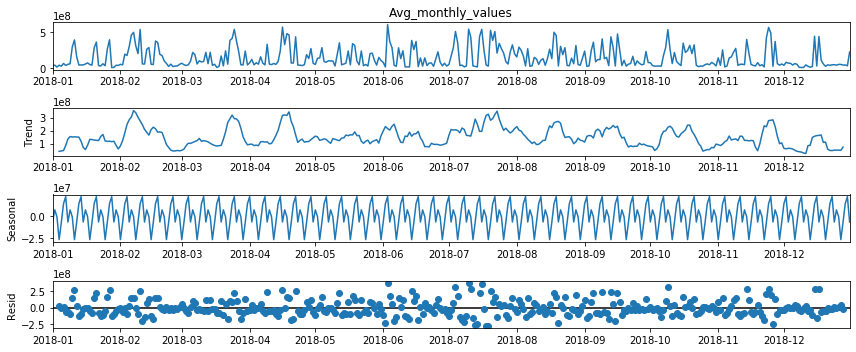

In [41]:
from pylab import rcParams
rcParams["figure.figsize"] = 12,5

result.plot()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
df_month.tail()

,Avg_monthly_values,TES 12,SimpleExpSmoothing,SES12
Date,,,,
2018-12-27,5.474153e+00,7.247240e+08,294462.633296,294462.633296
2018-12-28,4.568739e+00,1.470487e+04,176679.769639,176679.769639
2018-12-29,6.790212e+00,3.619596e+07,106009.689279,106009.689279
2018-12-30,1.047481e+01,8.572424e+06,63608.529652,63608.529652
2018-12-31,2.013565e+07,2.014867e+06,38169.307716,38169.307716


In [160]:
np.sqrt(mean_squared_error(df_month["SARIMAX"].iloc[365:],df_month["Avg_monthly_values"].iloc[365:]))

116921914.70868114

In [140]:
np.sqrt(mean_squared_error(df_month["Avg_monthly_values"],df_month["TES 12"]))

148053031.04905283

In [161]:
r2_score(df_month["SARIMAX"].iloc[365:],df_month["Avg_monthly_values"].iloc[365:])

-4.954118783664247

In [76]:
df_month["Avg_monthly_values"].describe()

count    7.300000e+02
mean     1.317276e+08
std      1.331503e+08
min      1.183940e+07
25%      4.064187e+07
50%      6.373871e+07
75%      1.990654e+08
max      6.029616e+08
Name: Avg_monthly_values, dtype: float64